# Обработка результатов

In [1]:
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
k = ['Orig', 0, 5]+ [10*i for i in range(1, 27)] + [263]
k_new = ['Orig', 250, 260, 263]
k_plot = [0, 0, 5]+ [10*i for i in range(1, 27)] + [263]
n = [0, 1, 2, 3, 4]

In [3]:
def get_graph(roc_tmp, title, columns):
    assert(len(columns) == len(roc_tmp))
    plt.figure(figsize=(18, 7))
    plt.plot(columns[1:], roc_tmp[1:], 'ro')
    plt.plot(columns[:1], roc_tmp[:1], 'bo')
    plt.xlabel('k')
    plt.ylabel('roc auc mean')
    plt.title(title)

In [4]:
def get_boxplot(roc_list, title , columns, figsize):
    tmp = np.hstack(roc_list)
    tmp = tmp.T
    assert(len(columns) == tmp.shape[1])
    dt = pd.DataFrame(tmp, columns=columns)
    color = dict(boxes='DarkGreen', whiskers='DarkOrange',
              medians='DarkBlue', caps='Gray')
    dt.plot.box(color=color, sym='r+',title=title, figsize=figsize)
    plt.xlabel('k')
    plt.ylabel('roc auc mean')

In [5]:
def get_roc_results(folder):
    roc_list = []
    for result_file in os.listdir(folder):
        result = pd.read_csv(folder + '/' + result_file)
        roc_list.append(result.as_matrix(["eval_roc_auc_mean"]))
    return roc_list

In [6]:
def Go_box(folder, title, k = k, figsize = (18, 7)): get_boxplot(get_roc_results(folder), title, k, figsize=figsize)

In [7]:
def Go_plot(path, title):
    
    result = pd.read_csv(path).as_matrix(["eval_roc_auc_mean"])
    result = result.reshape(result.shape[0], )
    get_graph(result, title, k_plot)

In [8]:
def Go_two_box(folder, title_1, title_2):
    get_boxplot(get_roc_results(folder),
                title_1 + '                 ' + title_2,
                ['Orig', 'low230', 'low240', 'Orig', 'low250', 'low260'],
               figsize = (8,6))    

# Построим Графики

## LogisticRegression
### Orig-Orig The best model for each K

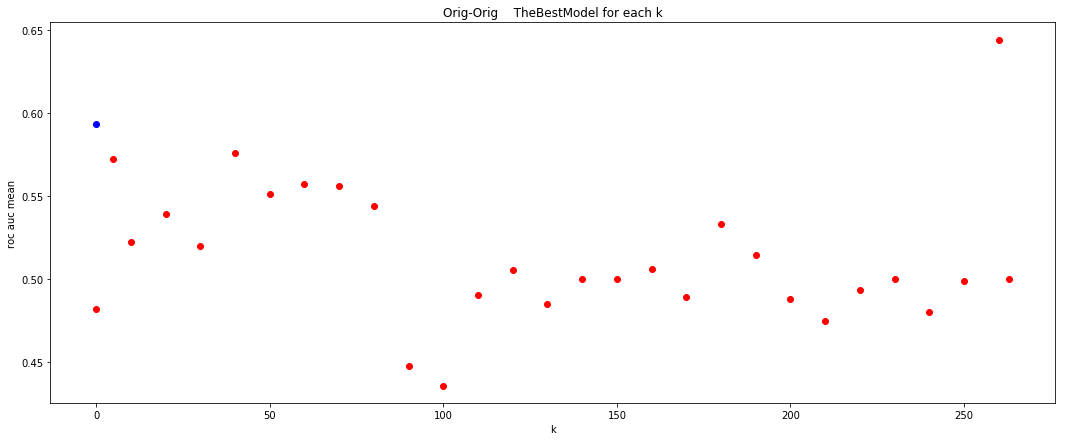

In [9]:
Go_plot('Results/Ver3.0/result_1.csv', 'Orig-Orig    TheBestModel for each k')

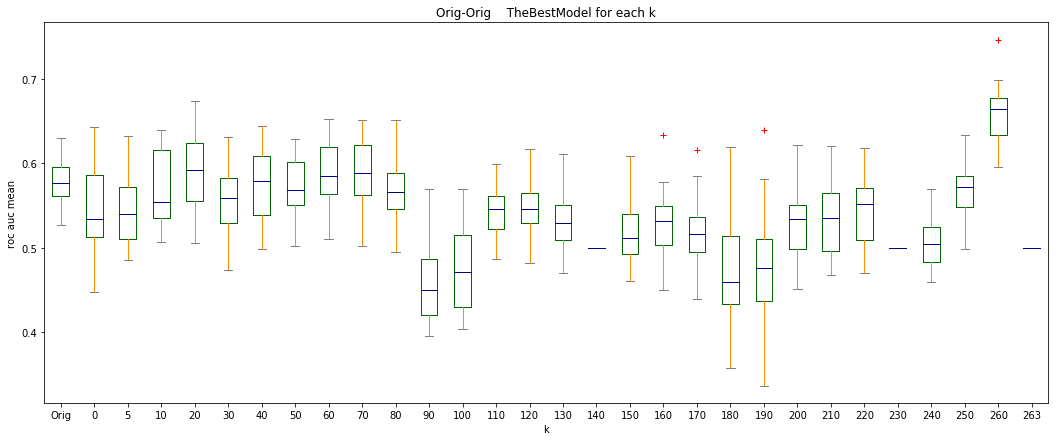

In [10]:
Go_box('Results/Ver3.0','Orig-Orig    TheBestModel for each k')

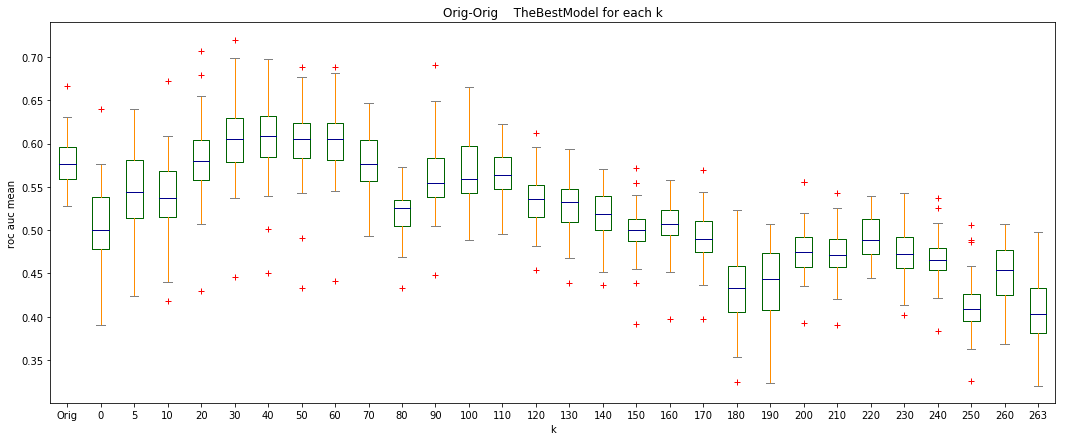

In [9]:
Go_box('Results/Ver3.7','Orig-Orig    TheBestModel for each k')

### Binar-Orig The best model for each K

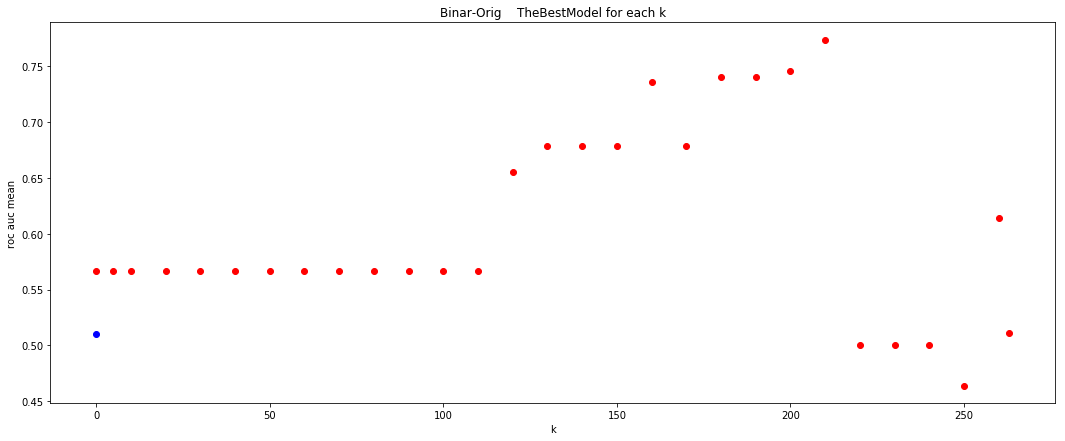

In [11]:
Go_plot('Results/Ver3.1/result_1.csv', 'Binar-Orig    TheBestModel for each k')

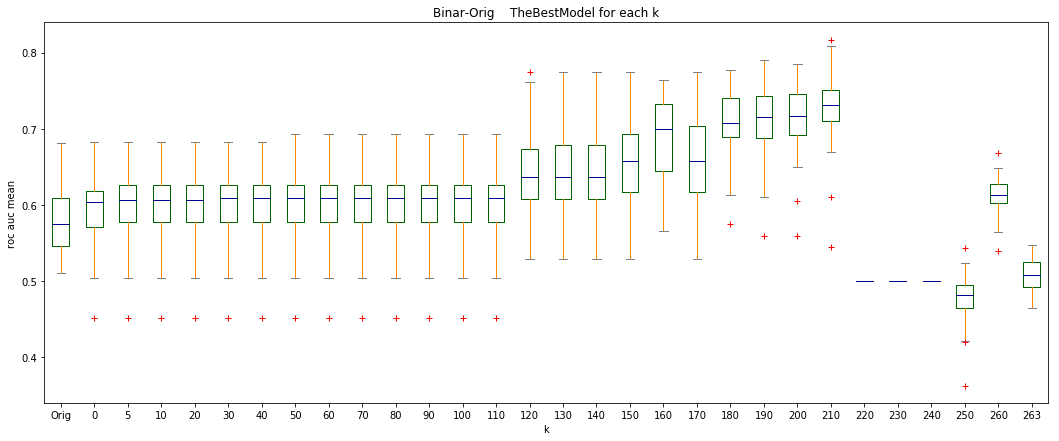

In [12]:
Go_box('Results/Ver3.1','Binar-Orig    TheBestModel for each k')

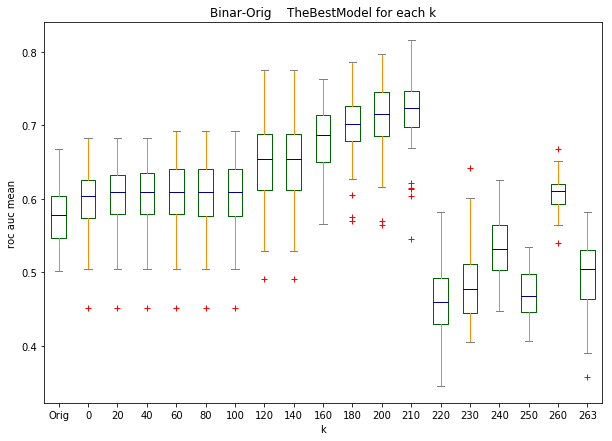

In [19]:
Go_box('Results/Ver3.6','Binar-Orig    TheBestModel for each k', 
       ['Orig'] + [20*i for i in range(11)] + [10*i for i in range(21, 27)] + [263], (10,7))

## Support Vector Classification
### Orig-Orig The best model for each K

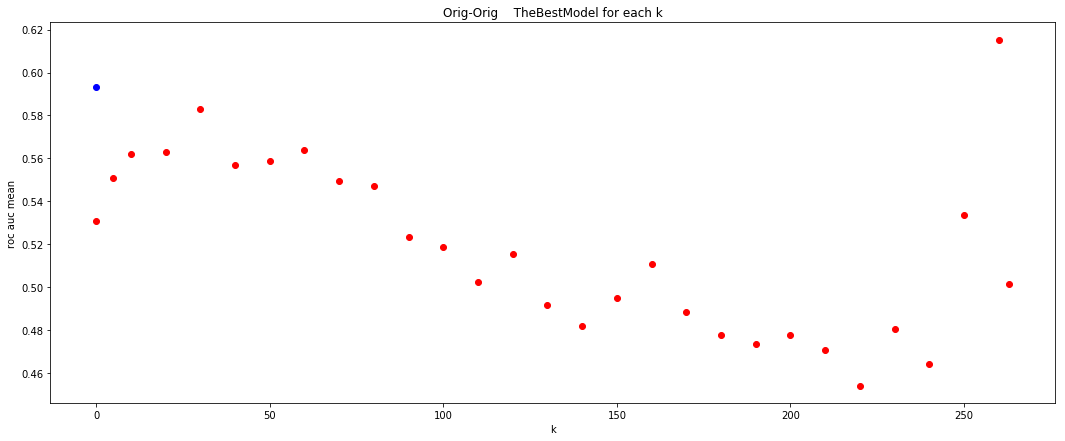

In [13]:
Go_plot('Results/Ver3/result_orig_SVC.scv', 'Orig-Orig    TheBestModel for each k')

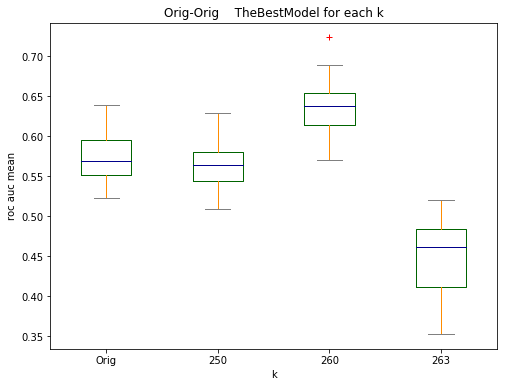

In [14]:
Go_box('Results/Ver3.3','Orig-Orig    TheBestModel for each k', k_new, figsize=(8, 6))

### Binar-Orig The best model for each K

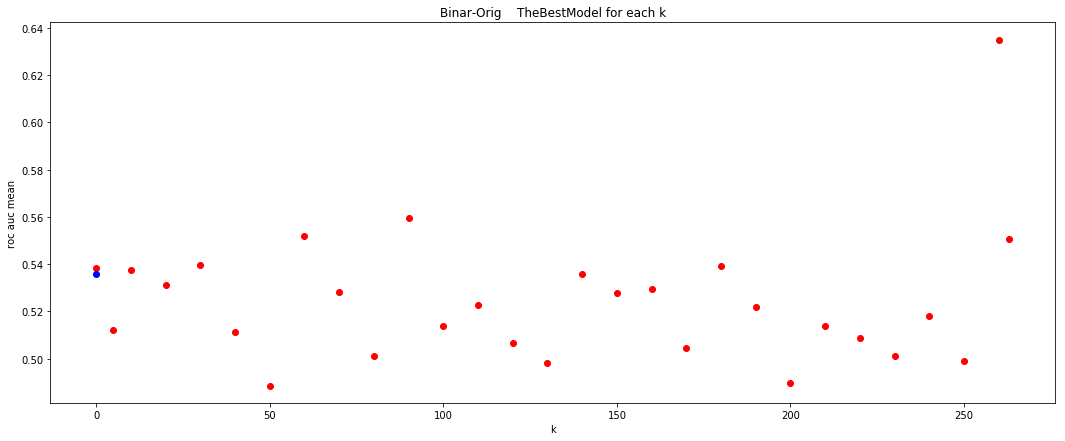

In [15]:
Go_plot('Results/Ver3/result_binar_SVC.scv', 'Binar-Orig    TheBestModel for each k')

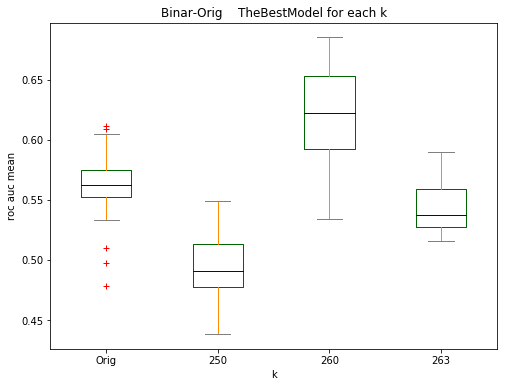

In [16]:
Go_box('Results/Ver3.2','Binar-Orig    TheBestModel for each k', k_new, figsize=(8,6))

## Random forest

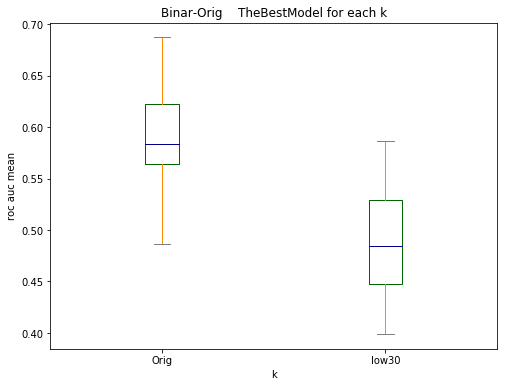

In [10]:
Go_box('Results/Ver3.4','Binar-Orig    TheBestModel for each k', ['Orig','low30'], figsize=(8,6))

## XGBoost

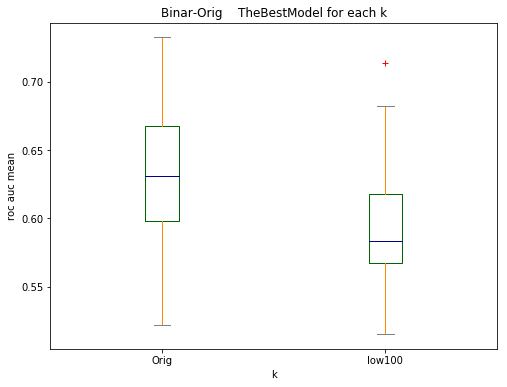

In [11]:
Go_box('Results/Ver3.5','Binar-Orig    TheBestModel for each k', ['Orig','low100'], figsize=(8,6))